Importing the necessary libraries

In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loading the dataset

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Extracting the jobs of the crew members from the credits dataset.     
Created a function called expand_crew and passed the crew_data, movie_id. 

In [5]:
def expand_crew(crew_data, movie_id):
    crew_list = ast.literal_eval(crew_data)
    expanded_crew = []
    for member in crew_list:
        expanded_crew.append({
            'movie_id': movie_id,
            'name': member['name'],
            'job': member['job']
        })
    return expanded_crew

In [6]:
crew_expanded = []
for index, row in credits.iterrows():
    crew_expanded.extend(expand_crew(row['crew'], row['movie_id']))

convert to a dataframe and store in crew_df

In [7]:
crew_df = pd.DataFrame(crew_expanded)
crew_df.head(5)

,movie_id,name,job
0,19995,Stephen E. Rivkin,Editor
1,19995,Rick Carter,Production Design
2,19995,Christopher Boyes,Sound Designer
3,19995,Christopher Boyes,Supervising Sound Editor
4,19995,Mali Finn,Casting


merge the crew_df to the movies df with common columns id

In [8]:
df = pd.merge(crew_df, 
                     movies[['id', 'title', 'vote_average', 'vote_count', 'budget', 'revenue']], 
                     left_on='movie_id', right_on='id'
)


In [9]:
df.head(5)

,movie_id,name,job,id,title,vote_average,vote_count,budget,revenue
0,19995,Stephen E. Rivkin,Editor,19995,Avatar,7.2,11800,237000000,2787965087
1,19995,Rick Carter,Production Design,19995,Avatar,7.2,11800,237000000,2787965087
2,19995,Christopher Boyes,Sound Designer,19995,Avatar,7.2,11800,237000000,2787965087
3,19995,Christopher Boyes,Supervising Sound Editor,19995,Avatar,7.2,11800,237000000,2787965087
4,19995,Mali Finn,Casting,19995,Avatar,7.2,11800,237000000,2787965087


In [10]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [11]:
movies.dropna(inplace=True)

In [12]:
df.isnull().sum()

movie_id        0
name            0
job             0
id              0
title           0
vote_average    0
vote_count      0
budget          0
revenue         0
dtype: int64

# Cleaning

The steps below; genres column, keywords, production_companies, spoken_languages, production_countries are inform of JSON file which is not suitable for analysis. 
The steps below are used to convert this columns from json file format to string format by extracting only the relevant information.  I used the apply function with ast.literal_eval, apply lambda to extract the names and also to join for this task. I alos created new columns, did renaming to some columns such as genres to genre and also deleted some.

In [13]:
movies['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4773                       [{"id": 35, "name": "Comedy"}]
4781    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4791                       [{"id": 27, "name": "Horror"}]
4796    [{"id": 878, "name": "Science Fiction"}, {"id"...
4801                                                   []
Name: genres, Length: 1493, dtype: object

In [14]:
movies['genres'] = movies['genres'].apply(ast.literal_eval)

In [15]:
movies['genre_names'] = movies['genres'].apply(lambda x: [d['name'] for d in x])

In [16]:
movies['genre_names']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4773                                         [Comedy]
4781                                [Comedy, Romance]
4791                                         [Horror]
4796               [Science Fiction, Drama, Thriller]
4801                                               []
Name: genre_names, Length: 1493, dtype: object

In [17]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_names
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]"
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]"


In [18]:
movies['genre_string'] = movies['genre_names'].apply(lambda x: ', '.join(x))


In [19]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_names,genre_string
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","Action, Adventure, Fantasy, Science Fiction"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","Adventure, Fantasy, Action"
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]","Action, Adventure, Crime"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]","Action, Crime, Drama, Thriller"
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]","Action, Adventure, Science Fiction"


In [20]:
movies.drop(['genres', 'genre_names'], inplace=True, axis=1)

In [21]:
movies.rename({'genre_string': 'genre'}, axis=1, inplace=True)

In [22]:
movies['keywords'] = movies['keywords'].apply(ast.literal_eval)
movies['keywords'] = movies['keywords'].apply(lambda x: [d['name'] for d in x])

In [23]:
movies['keywords']

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4773             [salesclerk, loser, aftercreditsstinger]
4781    [dating, divorce, sex scene, sex comedy, anti ...
4791                                      [home invasion]
4796    [distrust, garage, identity crisis, time trave...
4801                                                   []
Name: keywords, Length: 1493, dtype: object

In [24]:
movies['keywords'] = movies['keywords'].apply(lambda x: ', '.join(x))


In [25]:
movies.head(5)

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre
0,237000000,http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction"
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action"
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime"
3,250000000,http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller"
4,260000000,http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction"


In [26]:
movies['production_companies'] = movies['production_companies'].apply(ast.literal_eval)
movies['production_companies'] = movies['production_companies'].apply(lambda x: [d['name'] for d in x])

In [27]:
movies['production_companies'] = movies['production_companies'].apply(lambda x: ', '.join(x))


In [28]:
movies.head(5)

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre
0,237000000,http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction"
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action"
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime"
3,250000000,http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller"
4,260000000,http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction"


In [29]:
movies['production_countries'] = movies['production_countries'].apply(ast.literal_eval)
movies['production_countries'] = movies['production_countries'].apply(lambda x: [d['name'] for d in x])

In [30]:
movies['production_countries'] = movies['production_countries'].apply(lambda x: ', '.join(x))


In [31]:
movies.head(5)

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre
0,237000000,http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction"
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action"
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime"
3,250000000,http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller"
4,260000000,http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction"


In [32]:
movies['spoken_languages'] = movies['spoken_languages'].apply(ast.literal_eval)
movies['spoken_languages'] = movies['spoken_languages'].apply(lambda x: [d['name'] for d in x])

In [33]:
movies['spoken_languages'] = movies['spoken_languages'].apply(lambda x: ', '.join(x))


In [34]:
movies.head(5)

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre
0,237000000,http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction"
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action"
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime"
3,250000000,http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller"
4,260000000,http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction"


df is the dataframe that contains the information for each crew member of the movies they participated.
I use this dataframe to analyze the jobs columns, mostly directors.

In [35]:
df.head(5)

,movie_id,name,job,id,title,vote_average,vote_count,budget,revenue
0,19995,Stephen E. Rivkin,Editor,19995,Avatar,7.2,11800,237000000,2787965087
1,19995,Rick Carter,Production Design,19995,Avatar,7.2,11800,237000000,2787965087
2,19995,Christopher Boyes,Sound Designer,19995,Avatar,7.2,11800,237000000,2787965087
3,19995,Christopher Boyes,Supervising Sound Editor,19995,Avatar,7.2,11800,237000000,2787965087
4,19995,Mali Finn,Casting,19995,Avatar,7.2,11800,237000000,2787965087


In [36]:
df

,movie_id,name,job,id,title,vote_average,vote_count,budget,revenue
0,19995,Stephen E. Rivkin,Editor,19995,Avatar,7.2,11800,237000000,2787965087
1,19995,Rick Carter,Production Design,19995,Avatar,7.2,11800,237000000,2787965087
2,19995,Christopher Boyes,Sound Designer,19995,Avatar,7.2,11800,237000000,2787965087
3,19995,Christopher Boyes,Supervising Sound Editor,19995,Avatar,7.2,11800,237000000,2787965087
4,19995,Mali Finn,Casting,19995,Avatar,7.2,11800,237000000,2787965087
...,...,...,...,...,...,...,...,...,...
129576,25975,Clark Peterson,Executive Producer,25975,My Date with Drew,6.3,16,0,0
129577,25975,Andrew Reimer,Executive Producer,25975,My Date with Drew,6.3,16,0,0
129578,25975,Brian Herzlinger,Director,25975,My Date with Drew,6.3,16,0,0
129579,25975,Jon Gunn,Director,25975,My Date with Drew,6.3,16,0,0


Let's perform aggregation to the jobs column in the df.

In [37]:
jobs = df.groupby('job').agg({
    'vote_average': 'mean',
    'vote_count' : 'sum',
    'budget': 'sum',
    'revenue' : 'sum',
    'name' : 'nunique'
})

In [38]:
jobs = jobs.reset_index()
jobs

,job,vote_average,vote_count,budget,revenue,name
0,24 Frame Playback,6.628571,25233,1044000000,3397685005,12
1,2D Artist,6.600000,11729,417000000,1778914757,4
2,2D Supervisor,6.025000,3877,315000000,401004993,4
3,3D Animator,6.191304,37801,1454500000,4136449633,21
4,3D Artist,6.097143,44359,2130000000,5727480970,32
...,...,...,...,...,...,...
413,Vocal Coach,6.933333,3418,125883848,951872489,6
414,Wardrobe Supervisor,6.389362,49945,1803938783,6015113972,43
415,Wig Designer,5.966667,2040,134000000,207833786,3
416,Wigmaker,6.436232,266527,8923206028,25919545135,37


In [39]:
jobs.rename({'name': 'people_count_unique'}, axis=1, inplace=True)

In [40]:
jobs.head(5)

,job,vote_average,vote_count,budget,revenue,people_count_unique
0,24 Frame Playback,6.628571,25233,1044000000,3397685005,12
1,2D Artist,6.600000,11729,417000000,1778914757,4
2,2D Supervisor,6.025000,3877,315000000,401004993,4
3,3D Animator,6.191304,37801,1454500000,4136449633,21
4,3D Artist,6.097143,44359,2130000000,5727480970,32


Filtering Director from the jobs

In [41]:
df_directors = df[df['job'] == 'Director']
df_directors

,movie_id,name,job,id,title,vote_average,vote_count,budget,revenue
6,19995,James Cameron,Director,19995,Avatar,7.2,11800,237000000,2787965087
154,285,Gore Verbinski,Director,285,Pirates of the Caribbean: At World's End,6.9,4500,300000000,961000000
186,206647,Sam Mendes,Director,206647,Spectre,6.3,4466,245000000,880674609
343,49026,Christopher Nolan,Director,49026,The Dark Knight Rises,7.6,9106,250000000,1084939099
558,49529,Andrew Stanton,Director,49529,John Carter,6.1,2124,260000000,284139100
...,...,...,...,...,...,...,...,...,...
129571,231617,Scott Smith,Director,231617,"Signed, Sealed, Delivered",7.0,6,0,0
129574,126186,Daniel Hsia,Director,126186,Shanghai Calling,5.7,7,0,0
129578,25975,Brian Herzlinger,Director,25975,My Date with Drew,6.3,16,0,0
129579,25975,Jon Gunn,Director,25975,My Date with Drew,6.3,16,0,0


Carrying out aggragation for the directors 

In [42]:
directors = df_directors.groupby('name').agg({
    'vote_average': 'mean',
    'vote_count' : 'sum',
    'budget': 'sum',
    'revenue' : 'sum',
    'movie_id' : 'nunique'
})

In [43]:
directors.rename({'movie_id': 'number_of_movies'}, axis=1, inplace=True)

In [44]:
directors = directors.reset_index()
directors

,name,vote_average,vote_count,budget,revenue,number_of_movies
0,Aaron Hann,6.00,333,0,0,1
1,Aaron Schneider,6.50,100,7500000,0,1
2,Aaron Seltzer,3.54,1462,115000000,314717971,5
3,Aaron T. Wells,3.50,14,500000,0,1
4,Abel Ferrara,7.30,31,12500000,1227324,1
...,...,...,...,...,...,...
2572,Álex de la Iglesia,5.70,188,14100000,0,1
2573,Émile Gaudreault,5.60,28,4361898,3031801,1
2574,Éric Tessier,6.90,8,0,0,1
2575,Étienne Faure,6.20,11,0,0,1


In [45]:
#find out the director with the highest revenue
df_directors.loc[df_directors['revenue'].idxmax()]


movie_id                19995
name            James Cameron
job                  Director
id                      19995
title                  Avatar
vote_average              7.2
vote_count              11800
budget              237000000
revenue            2787965087
Name: 6, dtype: object

In [46]:
#find out the director with the lowest revenue
df_directors.loc[df_directors['revenue'].idxmin()]

movie_id               79698
name            Roland Joffé
job                 Director
id                     79698
title             The Lovers
vote_average             4.8
vote_count                34
budget              27000000
revenue                    0
Name: 5444, dtype: object

Analyzing the top directors by sorting out values by vote_average.
Visualize using a barplot

In [47]:
top_directors = directors.sort_values(by='vote_average', ascending=False).head(10)


In [48]:
top_directors = top_directors.reset_index()

In [49]:
%matplotlib inline

<Figure size 1000x600 with 0 Axes>

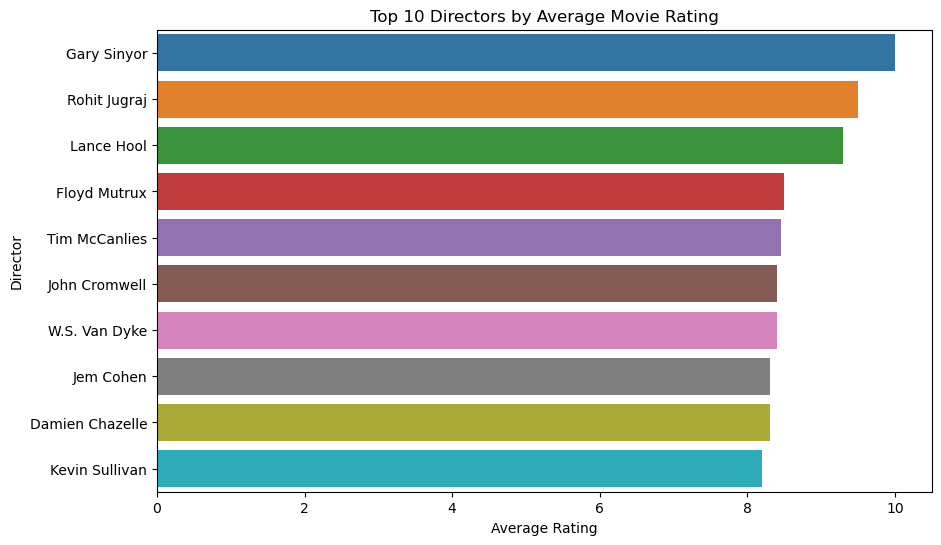

<Figure size 1000x600 with 0 Axes>

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_directors, x='vote_average', y='name')
plt.title('Top 10 Directors by Average Movie Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.figure(figsize=(10, 6))


In [51]:
top_directors.head(5)

,index,name,vote_average,vote_count,budget,revenue,number_of_movies
0,789,Gary Sinyor,10.00,1,0,0,1
1,2114,Rohit Jugraj,9.50,2,0,0,1
2,1424,Lance Hool,9.30,2,0,0,1
3,731,Floyd Mutrux,8.50,2,10500000,123509,1
4,2388,Tim McCanlies,8.45,261,0,565592,2


# Let's try to analyze the genre column

In [52]:
movies['genre']

0       Action, Adventure, Fantasy, Science Fiction
1                        Adventure, Fantasy, Action
2                          Action, Adventure, Crime
3                    Action, Crime, Drama, Thriller
4                Action, Adventure, Science Fiction
                           ...                     
4773                                         Comedy
4781                                Comedy, Romance
4791                                         Horror
4796               Science Fiction, Drama, Thriller
4801                                               
Name: genre, Length: 1493, dtype: object

counts for each genre using value_counts()

In [53]:
counts_genre = movies['genre'].value_counts()
counts_genre

genre
Drama                                          91
Comedy                                         74
Drama, Romance                                 47
Comedy, Romance                                38
Comedy, Drama                                  32
                                               ..
Action, Comedy, Drama, Family, Thriller         1
Action, Adventure, Horror, Science Fiction      1
Adventure, Family, Mystery, Science Fiction     1
Science Fiction, Comedy, Family, Romance        1
Drama, Action, Comedy                           1
Name: count, Length: 555, dtype: int64

Visualizing the top 10 genres. 
Here I tried to plot for all genres but genres are just too many so I decided to plot for only top 10 by counts as carried out above. 

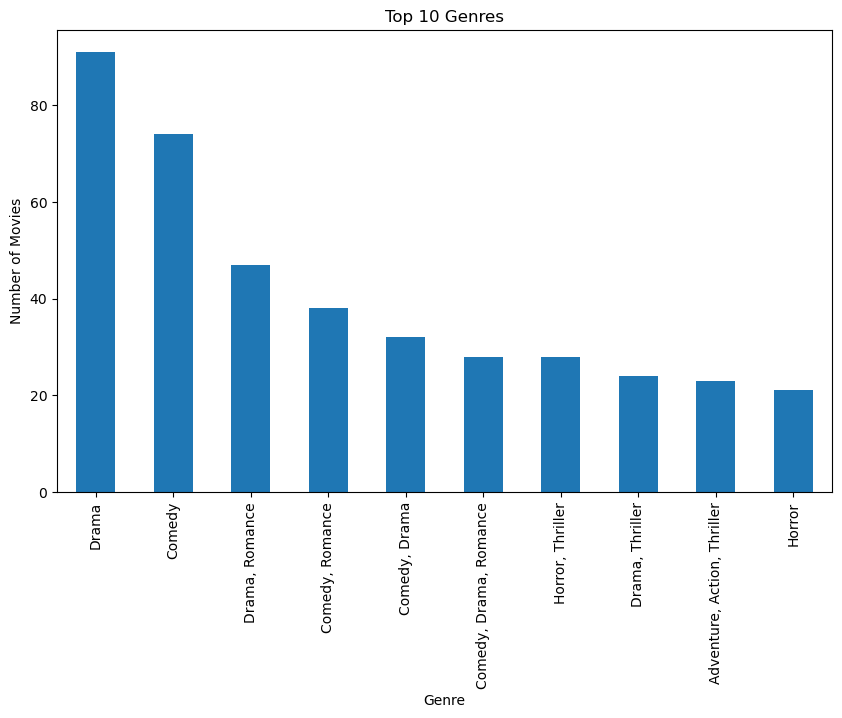

In [54]:
top_genres = counts_genre.head(10)  
top_genres.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()


used a threshold of 50 to plot the distribution of all genres and it really worked out.


In [55]:
threshold = 50  
genre_counts = movies['genre'].value_counts()
common_genres = genre_counts[genre_counts > threshold]
rare_genres = genre_counts[genre_counts <= threshold].sum()

combined_genres = pd.concat([common_genres, pd.Series({'Other': rare_genres})])


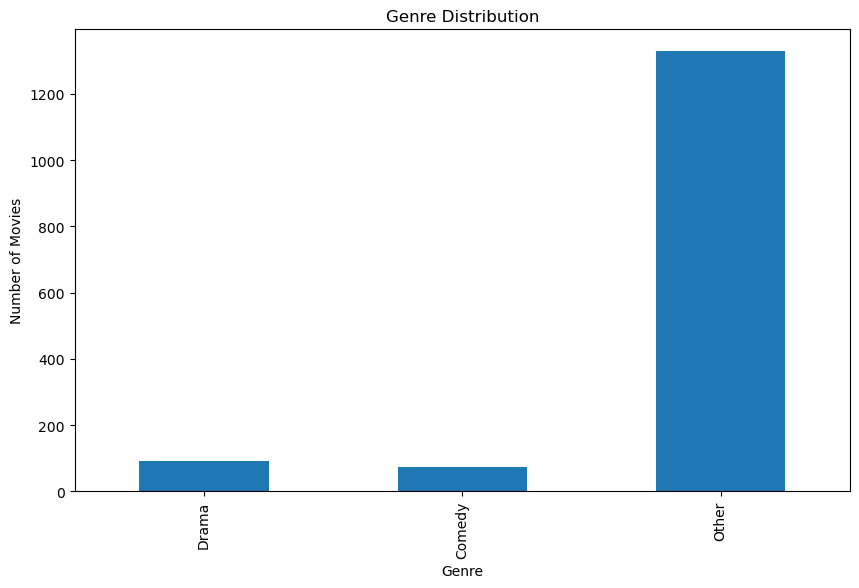

In [56]:
combined_genres.plot(kind='bar', figsize=(10,6))
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel("Number of Movies")
plt.show()

In [57]:
movies.head(5)

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre
0,237000000,http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction"
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action"
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime"
3,250000000,http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller"
4,260000000,http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction"


Analysis of average votes for each genre. Used describe and also visualize using a histogram.

In [58]:
movies['vote_average'].describe()


count    1493.000000
mean        6.272873
std         0.970480
min         0.000000
25%         5.800000
50%         6.300000
75%         6.900000
max         8.400000
Name: vote_average, dtype: float64

Text(0, 0.5, 'Frequency')

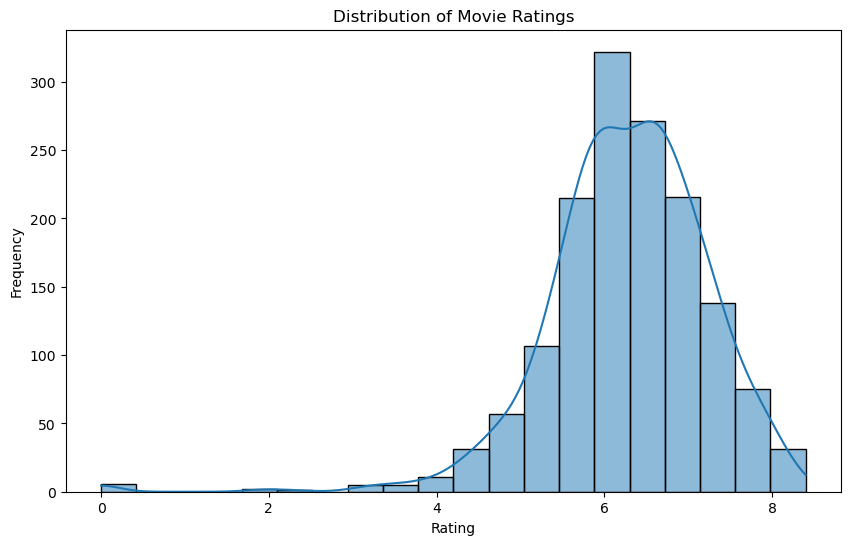

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

There seems to be outliers. We can check by plotting a boxplot of average votes

Text(0.5, 0, 'Rating')

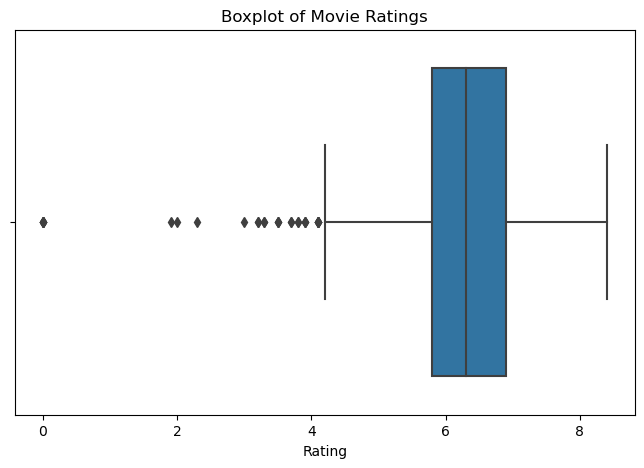

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=movies['vote_average'])
plt.title('Boxplot of Movie Ratings')
plt.xlabel('Rating')


# Director Analysis

In [61]:
df_directors

,movie_id,name,job,id,title,vote_average,vote_count,budget,revenue
6,19995,James Cameron,Director,19995,Avatar,7.2,11800,237000000,2787965087
154,285,Gore Verbinski,Director,285,Pirates of the Caribbean: At World's End,6.9,4500,300000000,961000000
186,206647,Sam Mendes,Director,206647,Spectre,6.3,4466,245000000,880674609
343,49026,Christopher Nolan,Director,49026,The Dark Knight Rises,7.6,9106,250000000,1084939099
558,49529,Andrew Stanton,Director,49529,John Carter,6.1,2124,260000000,284139100
...,...,...,...,...,...,...,...,...,...
129571,231617,Scott Smith,Director,231617,"Signed, Sealed, Delivered",7.0,6,0,0
129574,126186,Daniel Hsia,Director,126186,Shanghai Calling,5.7,7,0,0
129578,25975,Brian Herzlinger,Director,25975,My Date with Drew,6.3,16,0,0
129579,25975,Jon Gunn,Director,25975,My Date with Drew,6.3,16,0,0


Group directors by name and claculating the count for the movie_id which I'll rename to movie_count to show the count of all movies the director was incharge.

In [62]:
directors_movies = df.groupby('name').agg({'movie_id': 'count'}).rename({'movie_id': 'movie_count'}, axis=1)
directors_movies


,movie_count
name,
\tMak Tin-Shu,1
Ivan Vorlíček,1
"""Weird Al"" Yankovic",1
'Chema' Hernandez,2
'Cowboy' James Hollan,1
...,...
Úrsula García,1
Łukasz Żal,1
Şafak Binay,1


In [63]:
directors_movies = directors_movies.reset_index()

In [64]:
directors_movies

,name,movie_count
0,\tMak Tin-Shu,1
1,Ivan Vorlíček,1
2,"""Weird Al"" Yankovic",1
3,'Chema' Hernandez,2
4,'Cowboy' James Hollan,1
...,...,...
52229,Úrsula García,1
52230,Łukasz Żal,1
52231,Şafak Binay,1
52232,Борис Стругацкий,2


Creat a variable I named prolific_directors to keep the directors with there movie_count starting with the highest to the lowest.
I used the sort_values(). Created barplot to visualize the same

In [65]:
prolific_directors = directors_movies.sort_values(by='movie_count', ascending=False).head(10)
prolific_directors

,name,movie_count
42394,Robert Rodriguez,104
47127,Steven Spielberg,84
3713,Avy Kaufman,83
33082,Mary Vernieu,82
12253,Deborah Aquila,75
18675,Hans Zimmer,71
20870,James Newton Howard,69
18846,Harvey Weinstein,68
5134,Bob Weinstein,67
50020,Tricia Wood,67


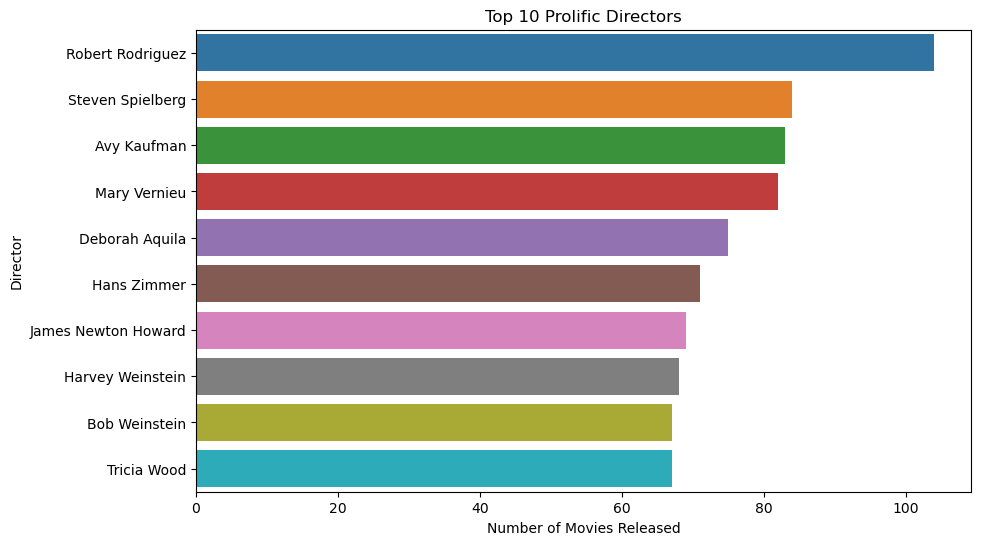

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(data=prolific_directors, x='movie_count', y='name')
plt.title('Top 10 Prolific Directors')
plt.xlabel('Number of Movies Released')
plt.ylabel('Director')
plt.show()

# The release_date column analysis

In [67]:
movies['release_date'].head(5)

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

converting to datetime coz the column is in object type and we can't work with it that way.

In [68]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [69]:
movies['release_date'].dtypes

dtype('<M8[ns]')

Group the number of movies based on the year they were released to see which movies were realesed on this specific year

In [70]:
movie_year = movies.groupby('release_date').size().reset_index(name='number_of_movies')
movie_year.head(10)

,release_date,number_of_movies
0,1937-12-20,1
1,1939-08-15,1
2,1940-11-13,1
3,1942-08-14,1
4,1962-10-04,1
5,1963-10-11,1
6,1964-07-06,1
7,1964-09-17,1
8,1965-12-16,1
9,1966-12-23,1


In [71]:
movie_year['number_of_movies'].max()

5

In [72]:
# Extract the year from the release date
movies['release_year'] = movies['release_date'].dt.year

# Grouping by release year to get the number of movies released each year
movie_years = movies.groupby('release_year').size().reset_index(name='number_of_movies')

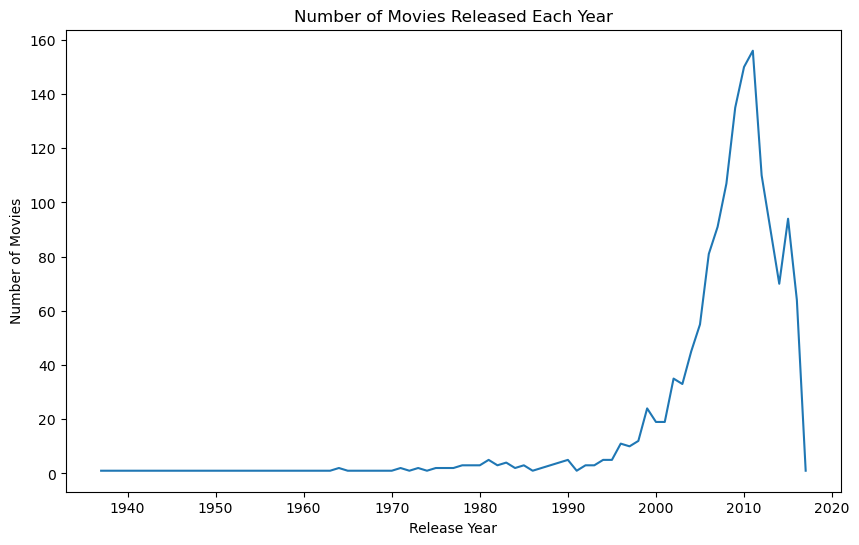

In [73]:
# Plot the number of movies released each year
plt.figure(figsize=(10, 6))
sns.lineplot(data=movie_years, x='release_year', y='number_of_movies')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

In [74]:
# Group year by decade
movies['decade'] = (movies['release_year'] // 10) * 10
releases_by_decade = movies.groupby('decade').size().reset_index(name='number_of_movies')

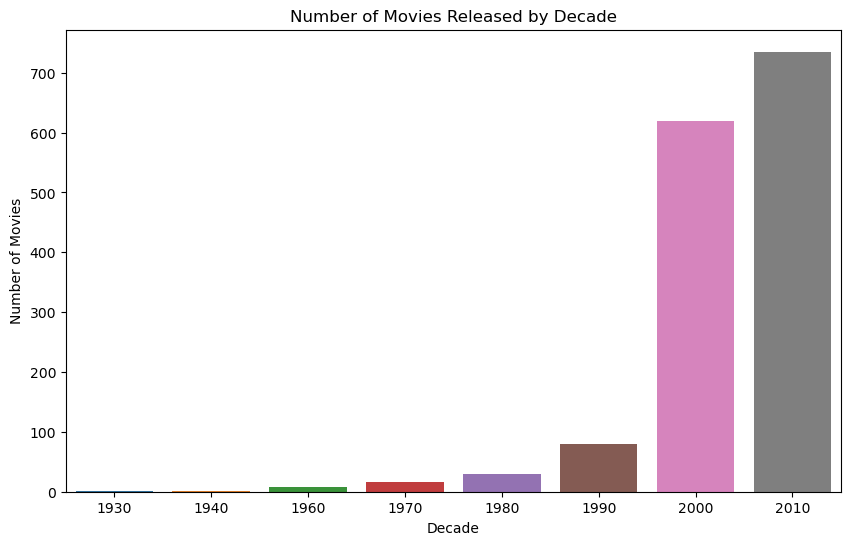

In [75]:
# Plot the number of movies released by decade
plt.figure(figsize=(10, 6))
sns.barplot(data=releases_by_decade, x='decade', y='number_of_movies')
plt.title('Number of Movies Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.show()


In [76]:
box_office_trends = movies.groupby('release_date').agg({
    'revenue': ['sum', 'mean']
}).reset_index()


In [77]:
box_office_trends

release_date    revenue             
                         sum         mean
0      1937-12-20  184925486  184925486.0
1      1939-08-15   33754967   33754967.0
2      1940-11-13   83320000   83320000.0
3      1942-08-14  267447150  267447150.0
4      1962-10-04   59600000   59600000.0
...           ...        ...          ...
1216   2016-08-02  745000000  745000000.0
1217   2016-08-10  143695338  143695338.0
1218   2016-08-17   94061311   94061311.0
1219   2016-09-09   15861566    7930783.0
1220   2017-02-03          0          0.0

[1221 rows x 3 columns]

In [78]:
box_office_trends.columns = ['release_year', 'total_revenue', 'average_revenue']

In [79]:
box_office_trends

,release_year,total_revenue,average_revenue
0,1937-12-20,184925486,184925486.0
1,1939-08-15,33754967,33754967.0
2,1940-11-13,83320000,83320000.0
3,1942-08-14,267447150,267447150.0
4,1962-10-04,59600000,59600000.0
...,...,...,...
1216,2016-08-02,745000000,745000000.0
1217,2016-08-10,143695338,143695338.0
1218,2016-08-17,94061311,94061311.0
1219,2016-09-09,15861566,7930783.0


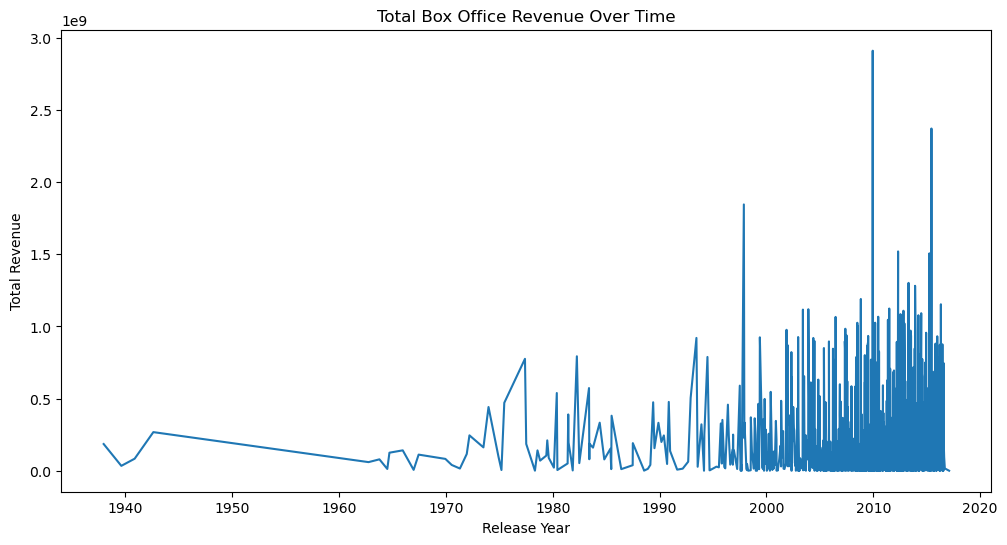

In [80]:
# Plot the total box office revenue over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=box_office_trends, x='release_year', y='total_revenue')
plt.title('Total Box Office Revenue Over Time')
plt.xlabel('Release Year')
plt.ylabel('Total Revenue')
plt.show()

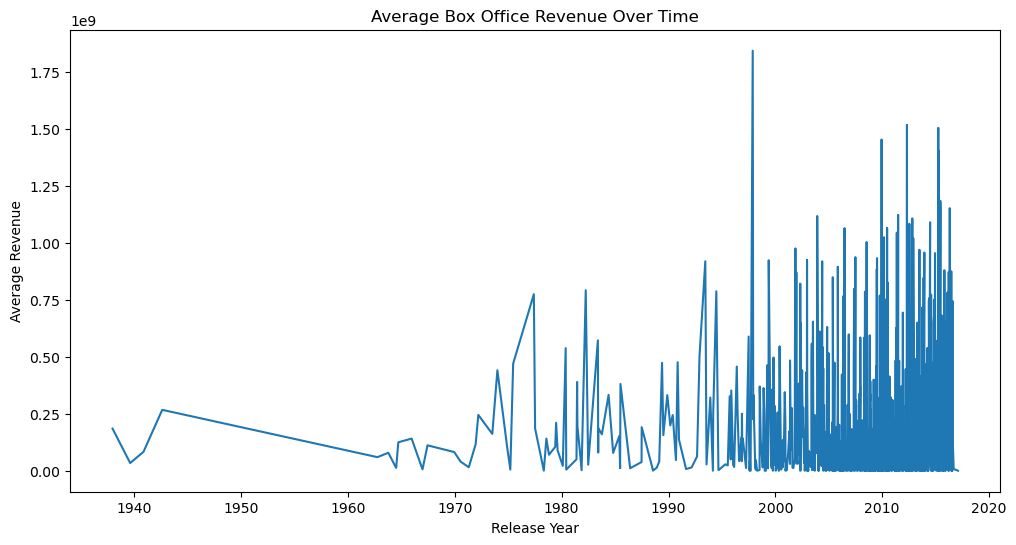

In [81]:
# Plot the average box office revenue over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=box_office_trends, x='release_year', y='average_revenue')
plt.title('Average Box Office Revenue Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue')
plt.show()

In [82]:
movies.head(5)

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre,release_year,decade
0,237000000,http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",...,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction",2009,2000
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,...,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action",2007,2000
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",...,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime",2015,2010
3,250000000,http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,...,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller",2012,2010
4,260000000,http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,...,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction",2012,2010


# Determining Which Genres Have Become More or Less Popular Over Time

In [83]:
movies['genre'] = movies['genre'].str.split(',')

In [84]:
movies['genre']

0       [Action,  Adventure,  Fantasy,  Science Fiction]
1                         [Adventure,  Fantasy,  Action]
2                           [Action,  Adventure,  Crime]
3                    [Action,  Crime,  Drama,  Thriller]
4                 [Action,  Adventure,  Science Fiction]
                              ...                       
4773                                            [Comedy]
4781                                  [Comedy,  Romance]
4791                                            [Horror]
4796                [Science Fiction,  Drama,  Thriller]
4801                                                  []
Name: genre, Length: 1493, dtype: object

Explode the genres to count each genre separately

In [85]:
movies_exploded = movies.explode('genre')

In [86]:
movies_exploded.head(5)

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre,release_year,decade
0,237000000,http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",...,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action,2009,2000
0,237000000,http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",...,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,Adventure,2009,2000
0,237000000,http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",...,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,Fantasy,2009,2000
0,237000000,http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",...,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,Science Fiction,2009,2000
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,...,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure,2007,2000


Group by release year and genre to count the number of movies per genre each year

In [87]:
genre_year_trends = movies_exploded.groupby(['release_year', 'genre']).size().unstack().fillna(0)
genre_year_trends

genre,,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,,
1937,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1962,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1963,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1964,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1965,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


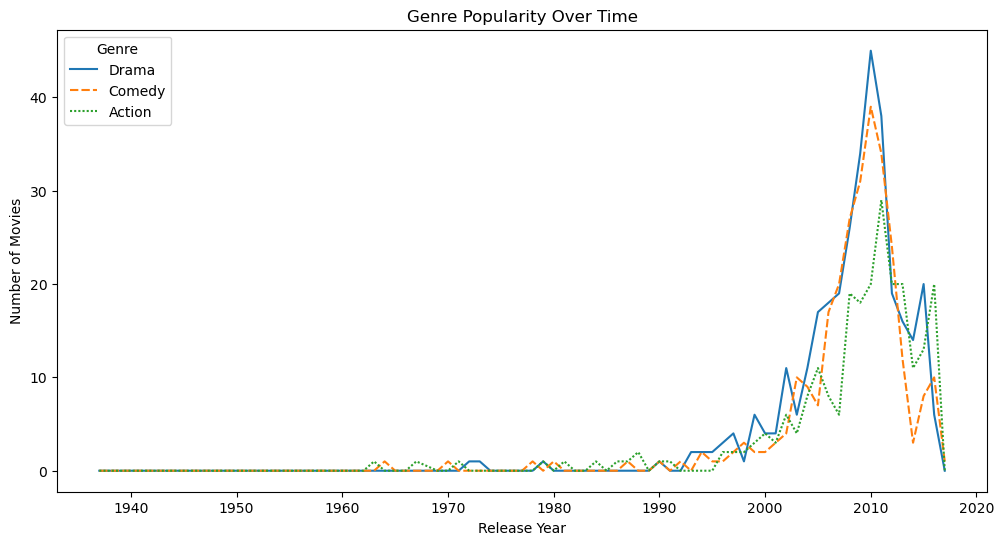

In [88]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_year_trends[['Drama', 'Comedy', 'Action']])
plt.title('Genre Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre')
plt.show()

In [89]:
movies.to_csv('movies_cleaned.csv', index=False)
df_directors.to_csv('directors_data.csv', index=False)
prolific_directors.to_csv('prolific_data.csv', index=False)
top_directors.to_csv('topdirectors.csv', index=False)
top_genres.to_csv('topgenres.csv', index=False)
genre_year_trends.to_csv('genre_year.csv', index=False)
jobs.to_csv('jobs_data.csv', index=False)
box_office_trends.to_csv('box_officedata.csv', index=False)